# Analysis functions on a file

In [11]:
import findspark
findspark.init('C:\\Spark\\spark-3.0.0-bin-hadoop2.7')
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [12]:
spark1 = SparkSession.builder.appName('aggs').getOrCreate()

### Read a dataset from a CSV file into a dataframe

In [13]:
df = spark1.read.csv('Data/sales_info.csv',inferSchema=True,header=True)

### See how the data looks like and print the schema

In [14]:
df.show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|    Sam|200.0|
|   GOOG|Charlie|120.0|
|   GOOG|  Frank|340.0|
|   MSFT|   Tina|600.0|
|   MSFT|    Amy|124.0|
|   MSFT|Vanessa|243.0|
|     FB|   Carl|870.0|
|     FB|  Sarah|350.0|
|   APPL|   John|250.0|
|   APPL|  Linda|130.0|
|   APPL|   Mike|750.0|
|   APPL|  Chris|350.0|
+-------+-------+-----+



In [15]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Person: string (nullable = true)
 |-- Sales: double (nullable = true)



### groupBy

In [16]:
df.groupby('Company')

#### We can perform a variety of operations on this pyspark.sql.group.GroupedData object. 
For example, taking a mean (average).

In [17]:
df.groupby('Company').mean()

DataFrame[Company: string, avg(Sales): double]

In [18]:
temp_frame = df.groupby('Company').mean()
temp_frame.show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+



No handles with labels found to put in legend.


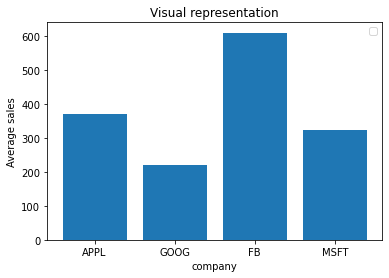

In [19]:
x = [row['Company'] for row in temp_frame.collect()]
y = [row['avg(Sales)'] for row in temp_frame.collect()]

plt.bar(x, y)
plt.xlabel('company')
plt.ylabel('Average sales')
plt.title('Visual representation')
plt.legend()
plt.show()


In [20]:
df.groupby('Company').max().show()

+-------+----------+
|Company|max(Sales)|
+-------+----------+
|   APPL|     750.0|
|   GOOG|     340.0|
|     FB|     870.0|
|   MSFT|     600.0|
+-------+----------+



In [21]:
df.groupby('Company').min().show()

+-------+----------+
|Company|min(Sales)|
+-------+----------+
|   APPL|     130.0|
|   GOOG|     120.0|
|     FB|     350.0|
|   MSFT|     124.0|
+-------+----------+



In [22]:
df.groupby('Company').count().show()

+-------+-----+
|Company|count|
+-------+-----+
|   APPL|    4|
|   GOOG|    3|
|     FB|    2|
|   MSFT|    3|
+-------+-----+



In [23]:
df.agg({'Sales':'sum'}).show()

+----------+
|sum(Sales)|
+----------+
|    4327.0|
+----------+



### Suppose we want the maximum of all sales

In [24]:
df.agg({'Sales':'max'}).show()

+----------+
|max(Sales)|
+----------+
|     870.0|
+----------+



In [25]:
group_data = df.groupBy('Company')

In [26]:
group_data.agg({'Sales':'max'}).show()

+-------+----------+
|Company|max(Sales)|
+-------+----------+
|   APPL|     750.0|
|   GOOG|     340.0|
|     FB|     870.0|
|   MSFT|     600.0|
+-------+----------+



### Import and use other functions

In [27]:
from pyspark.sql.functions import stddev,countDistinct,count,avg

In [28]:
df.agg({'Sales':'stddev'}).show()

+------------------+
|     stddev(Sales)|
+------------------+
|250.08742410799007|
+------------------+



#### We could compute the same quantity using simple select too

In [29]:
df.select(stddev('Sales')).show()

+------------------+
|stddev_samp(Sales)|
+------------------+
|250.08742410799007|
+------------------+



#### We can count how many total sales and how many of them are distinct in value

In [30]:
df.select(count('Sales')).show()

+------------+
|count(Sales)|
+------------+
|          12|
+------------+



In [31]:
df.select(countDistinct('Sales')).show()

+---------------------+
|count(DISTINCT Sales)|
+---------------------+
|                   11|
+---------------------+



### Formatting results


In [32]:
from pyspark.sql.functions import format_number

In [33]:
sales_std = df.select(stddev('Sales').alias('std'))

In [34]:
sales_std

DataFrame[std: double]

In [35]:
sales_std=sales_std.select(format_number('std',2).alias('final'))

In [36]:
sales_std

DataFrame[final: string]

In [37]:
sales_std.show()

+------+
| final|
+------+
|250.09|
+------+



In [38]:
# df.show()
temp_frame = df
temp_frame.show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|    Sam|200.0|
|   GOOG|Charlie|120.0|
|   GOOG|  Frank|340.0|
|   MSFT|   Tina|600.0|
|   MSFT|    Amy|124.0|
|   MSFT|Vanessa|243.0|
|     FB|   Carl|870.0|
|     FB|  Sarah|350.0|
|   APPL|   John|250.0|
|   APPL|  Linda|130.0|
|   APPL|   Mike|750.0|
|   APPL|  Chris|350.0|
+-------+-------+-----+



In [39]:
x = [row['Person'] for row in temp_frame.collect()]
y = [row['Sales'] for row in temp_frame.collect()]
z = [row['Company'] for row in temp_frame.collect()]

print(set(z))


{'MSFT', 'APPL', 'GOOG', 'FB'}


No handles with labels found to put in legend.


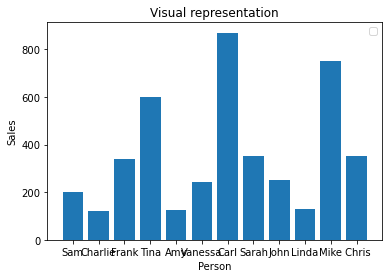

In [40]:


plt.bar(x, y)
plt.xlabel('Person')
plt.ylabel('Sales')
plt.title('Visual representation')
plt.legend()
plt.show()


In [41]:
df.orderBy('Sales').show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|Charlie|120.0|
|   MSFT|    Amy|124.0|
|   APPL|  Linda|130.0|
|   GOOG|    Sam|200.0|
|   MSFT|Vanessa|243.0|
|   APPL|   John|250.0|
|   GOOG|  Frank|340.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   MSFT|   Tina|600.0|
|   APPL|   Mike|750.0|
|     FB|   Carl|870.0|
+-------+-------+-----+



In [42]:
df.orderBy(df['Sales'].desc()).show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|     FB|   Carl|870.0|
|   APPL|   Mike|750.0|
|   MSFT|   Tina|600.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   GOOG|  Frank|340.0|
|   APPL|   John|250.0|
|   MSFT|Vanessa|243.0|
|   GOOG|    Sam|200.0|
|   APPL|  Linda|130.0|
|   MSFT|    Amy|124.0|
|   GOOG|Charlie|120.0|
+-------+-------+-----+

